** WHAT  WILL WE LEARN! **

1. Logistic Regression
2. Artificial Neural Network
3. 


In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

import os


# General Notes:
1. Deep learning is a technique like machine learning, in deep learning technique learns features from data.
2. machine learning algorithms are not sufficient for big datas, because of that, deep learning gives better results
3. Machine learning covers deep learning
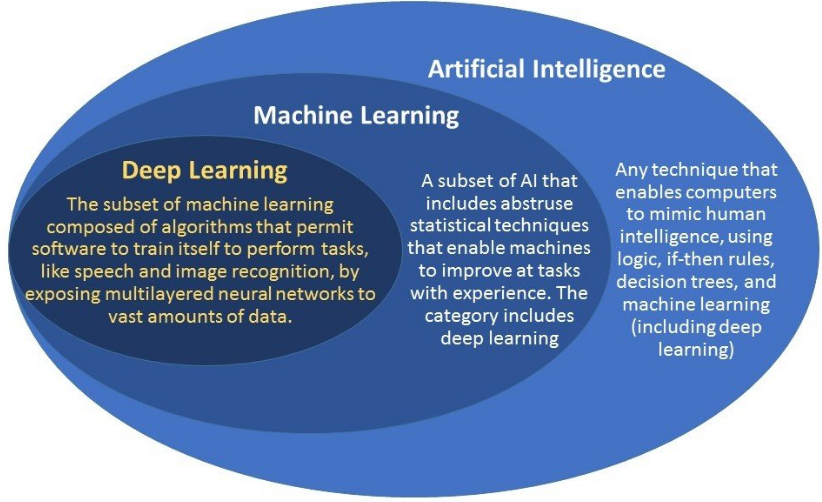

4. Learning rate is called as a hyperparameter




In [ ]:

#we will unzip our data with numpy 
xd = np.load('../input/Sign-language-digits-dataset/X.npy')
yd = np.load('../input/Sign-language-digits-dataset/Y.npy')
#we will plot our data
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(xd[203].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(xd[821].reshape(img_size, img_size))
plt.axis('off')


# we will look what we have in our data

There are 2062 sign language digits images in this data set
we have 205 image for each sign number that are from zero to 9

In [ ]:
# Join a sequence of arrays along an row axis.
X = np.concatenate((xd[:204], xd[615:821] ), axis=0)  
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
print("X shape: " , X.shape) # answer will be 410,64,64 and 410 means that there are 205 zeros and 205 ones
print("Y shape: " , Y.shape)

In [ ]:
#we will create our train and test datas

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.25, random_state=21)
number_of_train = Xtrain.shape[0]
number_of_test = Xtest.shape[0]

In [ ]:
#we have 3 dimnetionals input arrary (X), we need to make it 2 dimentional

Xtrain_flatten = Xtrain.reshape(number_of_train,Xtrain.shape[1]*Xtrain.shape[2])
Xtest_flatten = Xtest .reshape(number_of_test,Xtest.shape[1]*Xtest.shape[2])
print("X train flatten",Xtrain_flatten.shape)
print("X test flatten",Xtest_flatten.shape)
#we will see that we have 328 images and each image 4096 pixels

In [ ]:
xtrain = Xtrain_flatten.T
xtest = Xtest_flatten.T
ytrain = Ytrain.T
ytest = Ytest.T
print("x train: ",xtrain.shape)
print("x test: ",xtest.shape)
print("y train: ",ytrain.shape)
print("y test: ",ytest.shape)

# Logistic Regression
1. initialization
2.  Forward propogation
    * sigmoid function
    * loss(error) function
    * cost function
    
    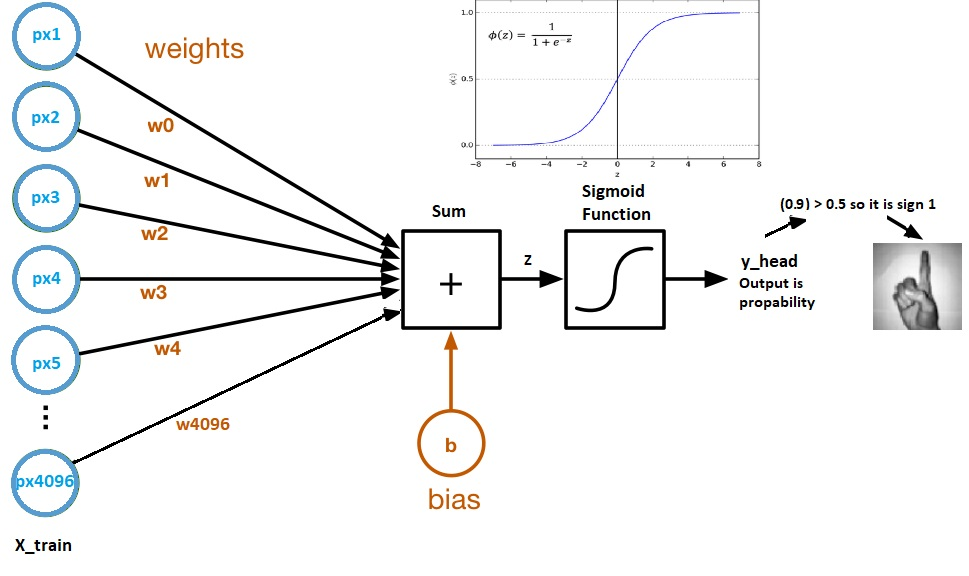

In [ ]:
#initializing parameteres w=weight and b=bias
dimension=xtrain.shape[0]
def initialize_weight_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

#we will see our results that w=(4096,1) and b=0.0
w,b=initialize_weight_and_bias(dimension)
w.shape,b

In [ ]:
#sigmoid function and z=(w.T)*x+b
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [ ]:
#forward propogation

def forward_propagation(w,b,xtrain,ytrain):
    z = np.dot(w.T,xtrain) + b
    y_head = sigmoid(z) # probabilistic 0-1
    #loss (error) function mathematical expression
    loss = -ytrain*np.log(y_head)-(1-ytrain)*np.log(1-y_head)
    #Cost function mathematical expression
    cost = (np.sum(loss))/xtrain.shape[1]      # x_train.shape[1]  is for scaling
    return cost  

# Optimization algorithm with Gradient Descent
    1. Backward propogation
    2. Updating parameters
    

   Note: Derivative of the weight and bias function and in here J=cost , m=Xtrain.shape[1]
    $$ \frac{\partial J}{\partial w} = \frac{1}{m}x(  y_head - y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (y_head-y)$$

In [ ]:
#we can write forward and backward propogation in the same function

def forward_backward_propagation(w,b,xtrain,ytrain):
    #part of the forward propogation 
    z = np.dot(w.T,xtrain) + b
    y_head = sigmoid(z)
    #loss (error) function mathematical expression
    loss = -ytrain*np.log(y_head)-(1-ytrain)*np.log(1-y_head)
    #Cost function mathematical expression
    cost = (np.sum(loss))/xtrain.shape[1]      # x_train.shape[1]  is for scaling
    
    #part of the backward propogation
    derivative_weight = (np.dot(xtrain,((y_head-ytrain).T)))/xtrain.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-ytrain)/xtrain.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

 # Updating parameters
 alpha=learning rate
 <a href="http://imgbb.com/"><img src="http://image.ibb.co/hYTTJH/8.jpg" alt="8" border="0"></a>

In [ ]:
#Updating (Learning) data

def update(w, b, xtrain, ytrain, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    #updating parameters depens on number of iterations
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,xtrain,ytrain)
        cost_list.append(cost)
        #part of update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [ ]:
#Prediction

def predict(w,b,xtest):
    #Xtest is input for forward propogation
    z = sigmoid(np.dot(w.T,xtest)+b)
    Y_prediction = np.zeros((1,xtest.shape[1]))
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

In [ ]:
#Logistic Regression
def logistic_regression(Xtrain,Ytrain,Xtest,Ytest,learning_rate,number_of_iterations):
    dimension=Xtrain.shape[0] #4096
    w,b=initialize_weight_and_bias(dimension)
    parameters,gradients,cost_list=update(w,b,Xtrain,Ytrain,learning_rate,number_of_iterations)
    
    y_prediction_test=predict(parameters["weight"],parameters["bias"],Xtest)
    y_prediction_train=predict(parameters["weight"],parameters["bias"],Xtrain)
    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - Ytrain)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - Ytest)) * 100))
    
logistic_regression(xtrain, ytrain, xtest, ytest,learning_rate = 0.01, number_of_iterations = 150)

# Artificial Neural Network (ANN)
* In this part first, we will learn 2-Layer ANN to understand how it works, Later we will see how we can make more label too
* first we will learn 2-layer Neural Network and we will learn;
        a. Size of layers and initializing parameters weight and bias
        b. forward propogation
        c. Loss function and Cost function
        d. backward propogation
        e. update parameters
        f. prediction with learn parameters weight and bias
        g. creat model

<a href="http://ibb.co/eF315x"><img src="http://preview.ibb.co/dajVyH/9.jpg" alt="9" border="0"></a>

# a. Size of layers and initializing parameters weight and bias
* For x_train that has 348 sample $x^{(348)}$:
$$z^{[1] (348)} =  W^{[1]} x^{(348)} + b^{[1] (348)}$$ 
$$a^{[1] (348)} = \tanh(z^{[1] (348)})$$
$$z^{[2] (348)} = W^{[2]} a^{[1] (348)} + b^{[2] (348)}$$
$$\hat{y}^{(348)} = a^{[2] (348)} = \sigma(z^{ [2] (348)})$$

In [ ]:
# a1,a2,a3 are hidden layers
def initialize_parameters_and_layer_sizes_Neural_Network(xtrain, ytrain):
    parameters = {"weight1": np.random.randn(3,xtrain.shape[0]) * 0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(ytrain.shape[0],3) * 0.1,
                  "bias2": np.zeros((ytrain.shape[0],1))}
    return parameters

# b. forward propogation

In [ ]:
def forward_propagation_Neural_Network(xtrain, parameters):

    Z1 = np.dot(parameters["weight1"],xtrain) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

   # c. Loss function and Cost function
  we wil find Loss and Cost function like at logistic regression. but we will use cross entropy function and this function is also the same with logistic regression
  <a href="https://imgbb.com/"><img src="https://image.ibb.co/nyR9LU/as.jpg" alt="as" border="0"></a><br />

In [ ]:
def compute_cost_Neural_Network(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost
#forward prpogation is complited

# d. backward propogation
now we will update our weight and bias values because of this we need to make a backward propogation


In [ ]:
def backward_propagation_Neural_Network(parameters, cache, X, Y):

    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

# e. update parameters 

In [ ]:
def update_parameters_Neural_Network(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    
    return parameters

   # f. prediction with learn parameters weight and bias   

In [ ]:
def predict_Neural_Network(parameters,xtest):
    # x_test is a input for forward propagation
    A2, cache = forward_propagation_Neural_Network(xtest,parameters)
    Y_prediction = np.zeros((1,xtest.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

 # g. Create Model

In [ ]:
def two_layer_neural_network(xtrain, ytrain,xtest,ytest, num_iterations):
    cost_list = []
    index_list = []
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_Neural_Network(xtrain, ytrain)

    for i in range(0, num_iterations):
         # forward propagation
        A2, cache = forward_propagation_Neural_Network(xtrain,parameters)
        # compute cost
        cost = compute_cost_Neural_Network(A2, ytrain, parameters)
         # backward propagation
        grads = backward_propagation_Neural_Network(parameters, cache, xtrain, ytrain)
         # update parameters
        parameters = update_parameters_Neural_Network(parameters, grads)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    # predict
    y_prediction_test = predict_Neural_Network(parameters,xtest)
    y_prediction_train = predict_Neural_Network(parameters,xtrain)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - ytrain)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - ytest)) * 100))
    return parameters

parameters = two_layer_neural_network(xtrain, ytrain,xtest,ytest, num_iterations=2000)

# Layer Neural Network
we will use keras library

loss:
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{1}$$

In [ ]:
xtrain,xtest,ytrain,ytest=xtrain.T,xtest.T,ytrain.T,ytest.T

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
def build_classifier():
    classifier = Sequential() # initialize neural network
    #uints=output dimensions of node, kernel_initializer=to initialize weight
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = xtrain.shape[1]))
    #with Dense , we can add new layer
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    #adam is optimization alghoritm for training Neural Network
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)# epochs=number of iterations
accuracies = cross_val_score(estimator = classifier, X = xtrain, y = ytrain, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
# predict
y_prediction_test = predict_Neural_Network(parameters,xtest.T)
y_prediction_train = predict_Neural_Network(parameters,xtrain.T)

    # Print train/test Errors
print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - ytrain.T)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - ytest.T)) * 100))
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Thank you for looking my kernel and thank you in advance for your comment and votes
Thanks to DATAI Team